# Exploratory Analysis for Turing Data Analysis test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

cardio_base = pd.read_csv('cardio_base.csv')
cardio_alco = pd.read_csv('cardio_alco.csv')
covid_data = pd.read_csv('covid_data.csv')
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


Age seems to be given in days instead of years, which is the most common way to measure human age.

In [3]:
cardio_base['age'] = (cardio_base['age']/365).astype(int)
cardio_base

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50,2,168,62.0,110,80,1,0
1,1,55,1,156,85.0,140,90,3,0
2,2,51,1,165,64.0,130,70,3,0
3,3,48,2,169,82.0,150,100,1,0
4,4,47,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,168,76.0,120,80,1,1
69996,99995,61,1,158,126.0,140,90,2,0
69997,99996,52,2,183,105.0,180,90,3,0
69998,99998,61,1,163,72.0,135,80,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

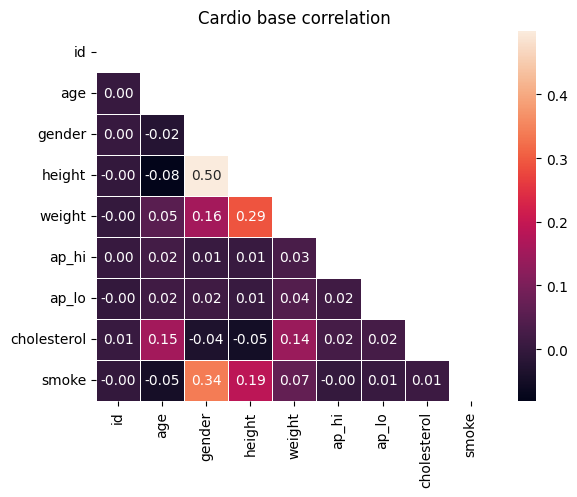

In [4]:
corr = cardio_base.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sea.heatmap(corr, linewidths=0.5, mask=mask, annot=True, fmt=".2f")
plt.title("Cardio base correlation")
plt.show

Strongest correlations are height-gender | smoke-gender | weight-height | smoke-height | weight-gender | cholesterol-age | cholesterol-weight

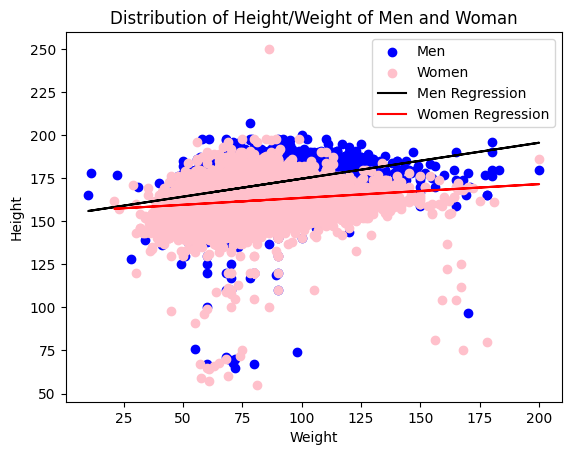

In [5]:
# Split genders
cardio_men = cardio_base.loc[cardio_base['gender'] == 2] # correct gender after making relation height-weight/man-woman
cardio_men = cardio_men.drop(columns=['gender'])
cardio_wom = cardio_base.loc[cardio_base['gender'] == 1] # correct gender after making relation height-weight/man-woman
cardio_wom = cardio_wom.drop(columns=['gender'])

# Get weight and height
men_weight = cardio_men['weight']
men_height = cardio_men['height']
wom_weight = cardio_wom['weight']
wom_height = cardio_wom['height']

# Create scatter plots
plt.scatter(x=men_weight, y=men_height, c='blue', label='Men')
plt.scatter(x=wom_weight, y=wom_height, c='pink', label='Women')

# Fit linear regression
men_slope, men_intercept = np.polyfit(men_weight, men_height, 1)
wom_slope, wom_intercept = np.polyfit(wom_weight, wom_height, 1)

# Plot regression
plt.plot(men_weight, men_slope * men_weight + men_intercept, color='black', label='Men Regression')
plt.plot(wom_weight, wom_slope * wom_weight + wom_intercept, color='red', label='Women Regression')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Distribution of Height/Weight of Men and Woman')
plt.legend()
plt.show()

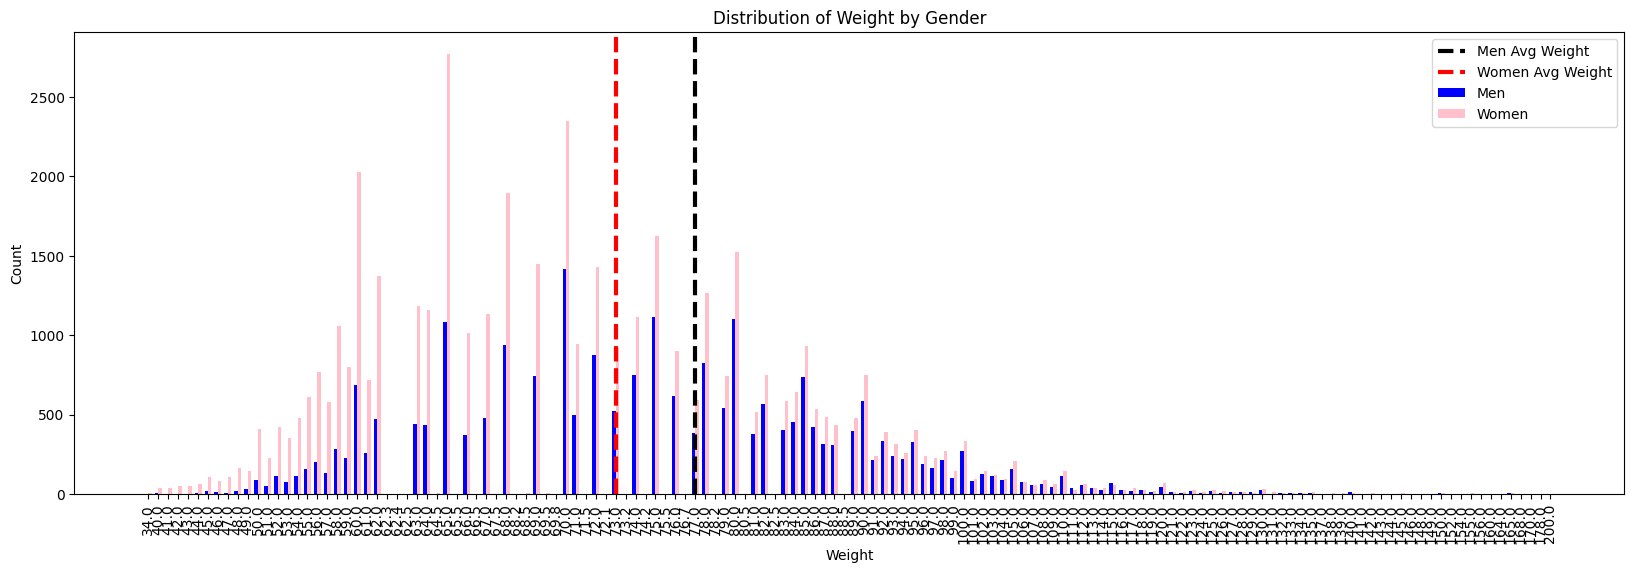

In [6]:
# Get weight counts
men_weight_counts = cardio_men.groupby("weight")["weight"].count()
wom_weight_counts = cardio_wom.groupby("weight")["weight"].count()

# Get unique weights
men_weights = men_weight_counts.index
wom_weights = wom_weight_counts.index

# Get shared weight values
common_weights = np.intersect1d(men_weights, wom_weights)

# Filter shared weight values
men_weight_counts = men_weight_counts[common_weights]
wom_weight_counts = wom_weight_counts[common_weights]

# Create bar chart group
species = np.arange(len(common_weights))
width = 0.35

# Get weight averages
men_avg_weight = cardio_men["weight"].mean()
wom_avg_weight = cardio_wom["weight"].mean()
men_avg_index_weight = np.abs(common_weights - men_avg_weight).argmin()
wom_avg_index_weight = np.abs(common_weights - wom_avg_weight).argmin()

# Create bar chart
plt.figure(figsize=(20, 6))
plt.bar(species - width/2, men_weight_counts, width, label="Men", color="blue")
plt.bar(species + width/2, wom_weight_counts, width, label="Women", color="pink")

# Plot averale weight lines
plt.axvline(x=men_avg_index_weight, color="black", linestyle="--", label="Men Avg Weight", linewidth=3)
plt.axvline(x=wom_avg_index_weight, color="red", linestyle="--", label="Women Avg Weight", linewidth=3)

plt.xlabel("Weight")
plt.ylabel("Count")
plt.title("Distribution of Weight by Gender")
plt.xticks(species, common_weights, rotation=80)
plt.legend()
plt.show()

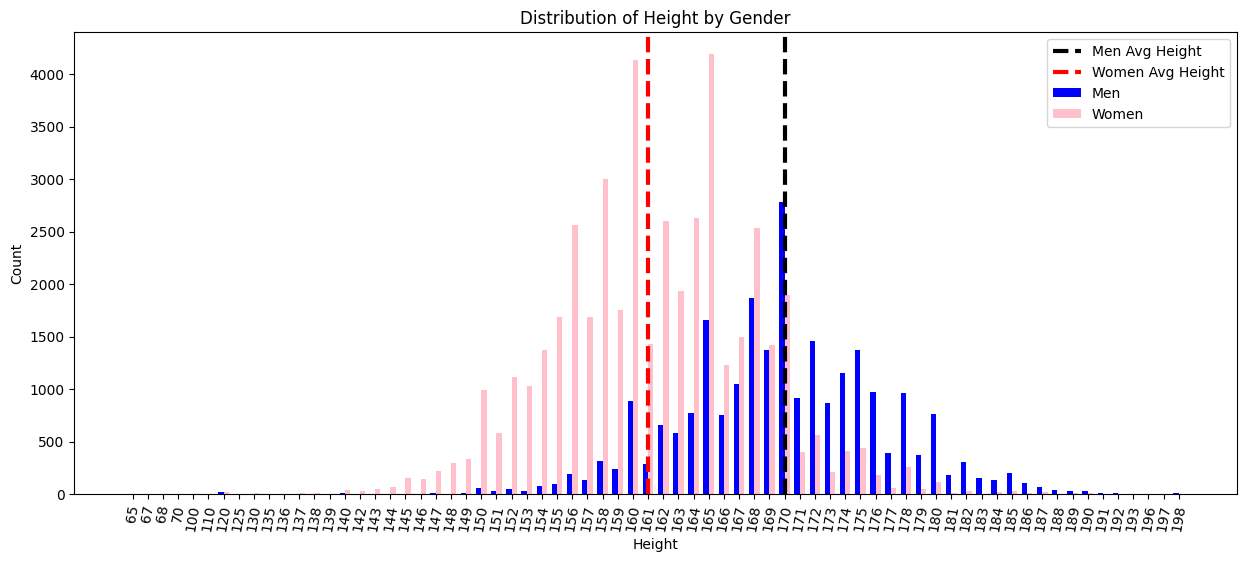

In [7]:
# Get average heights
men_avg_height = cardio_men["height"].mean()
wom_avg_height = cardio_wom["height"].mean()

# Get unique height values
men_heights = cardio_men["height"].unique()
wom_heights = cardio_wom["height"].unique()

# Get shared height values
common_heights = np.intersect1d(men_heights, wom_heights)

# Filter shared height values
men_height_counts = cardio_men.groupby("height")["height"].count()[common_heights]
wom_height_counts = cardio_wom.groupby("height")["height"].count()[common_heights]

# Create bar chart group
species = np.arange(len(common_heights))
width = 0.35

# Get height averages
men_avg_index_height = np.abs(common_heights - men_avg_height).argmin()
wom_avg_index_height = np.abs(common_heights - wom_avg_height).argmin()

# Plot bars
plt.figure(figsize=(15, 6))
plt.bar(species - width/2, men_height_counts, width, label="Men", color="blue")
plt.bar(species + width/2, wom_height_counts, width, label="Women", color="pink")

# Plot average heights
plt.axvline(x=men_avg_index_height, color="black", linestyle="--", label="Men Avg Height", linewidth=3)
plt.axvline(x=wom_avg_index_height, color="red", linestyle="--", label="Women Avg Height", linewidth=3)

plt.xlabel("Height")
plt.ylabel("Count")
plt.title("Distribution of Height by Gender")
plt.xticks(species, common_heights, rotation=80)
plt.legend()
plt.show()

Men tend to be higher and heavier due to evolutionary adaptation. This is seen across all cultures around the world so we can assume with certainty that gender number 2 are males (correct the cardio_men and cardio_wom if needed).

<function matplotlib.pyplot.show(close=None, block=None)>

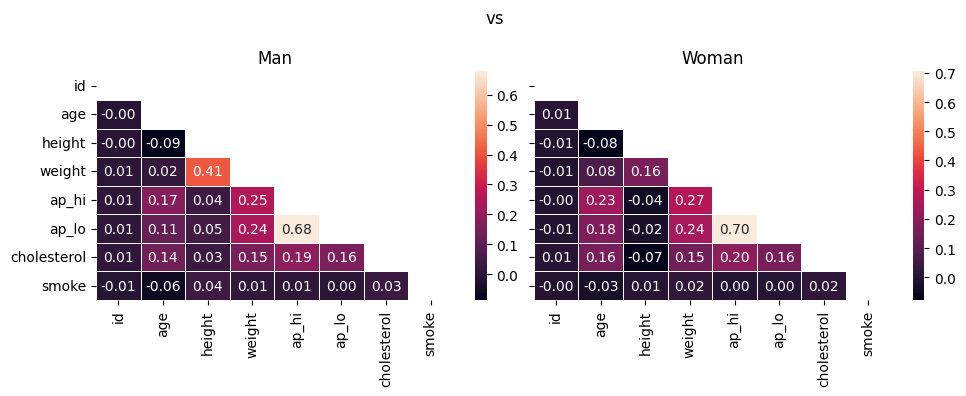

In [28]:
# Find correlations for men and woman
corr_men = cardio_men.corr()
corr_wom = cardio_wom.corr()

# Mask upper triengle
mask_gen = np.triu(np.ones_like(corr_men, dtype=bool))

# plt.rcParams["figure.autolayout"] = True

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True, figsize=(10, 4))

sea.heatmap(corr_men, ax=ax1, linewidths=0.5, mask=mask_gen, annot=True, fmt=".2f")
sea.heatmap(corr_wom, ax=ax2, linewidths=0.5, mask=mask_gen, annot=True, fmt=".2f")

fig.suptitle('vs')
ax1.set_title("Man")
ax2.set_title("Woman")

plt.show


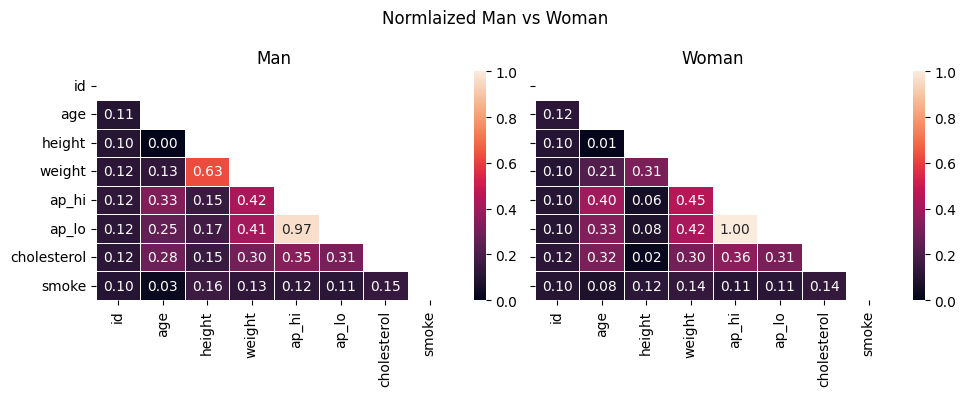

In [31]:
# Mask upper triangle
mask_gen = np.triu(np.ones_like(corr_men, dtype=bool))

# Get the max and min correlation
max_corr = max(corr_men.values[np.logical_not(mask_gen)].max(), corr_wom.values[np.logical_not(mask_gen)].max())
min_corr = min(corr_men.values[np.logical_not(mask_gen)].min(), corr_wom.values[np.logical_not(mask_gen)].min())

# Normalize correlation to 0 - 1 values
normalized_corr_men = (corr_men - min_corr) / (max_corr - min_corr)
normalized_corr_wom = (corr_wom - min_corr) / (max_corr - min_corr)

# Plot heatmaps
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(10, 4))
sea.heatmap(normalized_corr_men, ax=ax1, linewidths=0.5, mask=mask_gen, vmin=0, vmax=1, annot=True, fmt=".2f")#, cbar=False)
sea.heatmap(normalized_corr_wom, ax=ax2, linewidths=0.5, mask=mask_gen, vmin=0, vmax=1, annot=True, fmt=".2f")

fig.suptitle('Normlaized Man vs Woman')
ax1.set_title("Man")
ax2.set_title("Woman")

plt.show()

Splitting the data to gender category gives us new correlations that were canceled when calculated together.

ap_lo - ap-hi has a strong correlation, this could be because arterial pressure tends to increase or decrease together as it is a part of the same system.

ap-ih and ap-lo have a much more stronger correlation with weight than what we've seen before.

Cholesterol and arterial pressure also show a correlation.

weight - height has a stronger correlation in man than in woman.

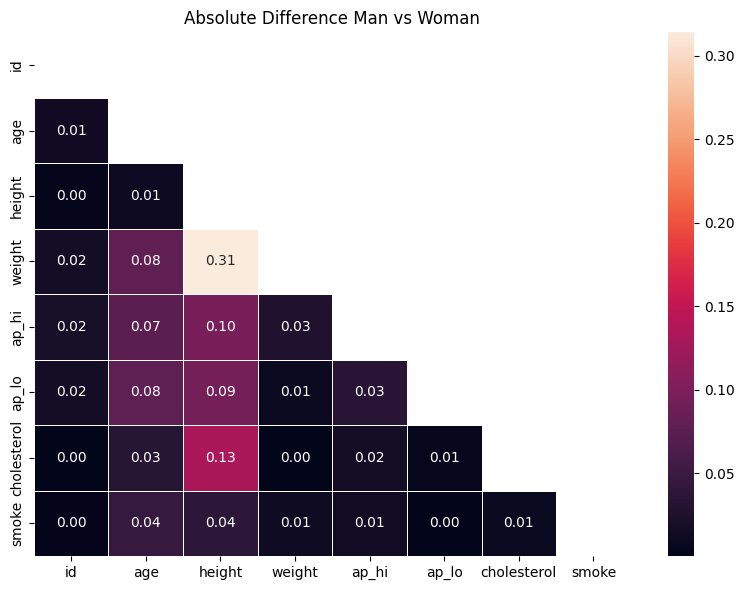

In [32]:
corr_diff = np.abs(normalized_corr_men - normalized_corr_wom)

# Create a mask to exclude the diagonal elements
mask_gen = np.triu(np.ones_like(corr_diff, dtype=bool))

# Create the heatmap for the normalized absolute difference
plt.figure(figsize=(8, 6))
sea.heatmap(corr_diff, linewidths=0.5, mask=mask_gen, annot=True, fmt=".2f")

plt.title("Absolute Difference Man vs Woman")
plt.show()

Looking for differences between man and woman, Weight-height is much more accentuated.

Cholesterol-height seems to differ somewhat, and other minor contrast is found in other traits.

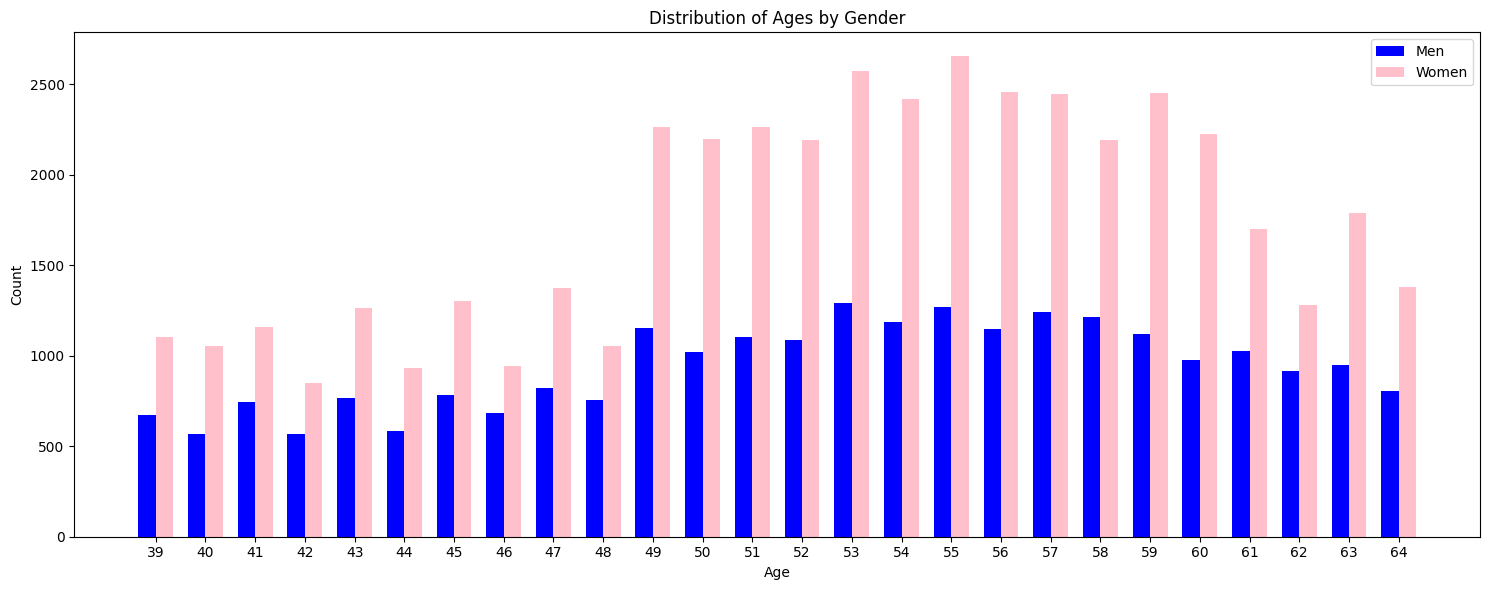

In [11]:
cardio_men = cardio_men[cardio_men['age'] >= 35] # Remove the outliers
cardio_wom = cardio_wom[cardio_wom['age'] >= 35] # Remove the outliers

men_age_counts = cardio_men.groupby("age")["age"].count()
wom_age_counts = cardio_wom.groupby("age")["age"].count()

# Get unique ages
men_ages = men_age_counts.index
wom_ages = wom_age_counts.index

# Get shared age values
common_ages = np.intersect1d(men_ages, wom_ages)

# Filter shared ages
men_age_counts = men_age_counts[common_ages]
wom_age_counts = wom_age_counts[common_ages]

# Create bar chart group
species = np.arange(len(common_ages))
width = 0.35

plt.figure(figsize=(15, 6))

plt.bar(species - width/2, men_age_counts, width, label="Men", color="blue")
plt.bar(species + width/2, wom_age_counts, width, label="Women", color="pink")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Ages by Gender")
plt.xticks(species, common_ages)  # Set x-axis labels
plt.legend()
plt.show()

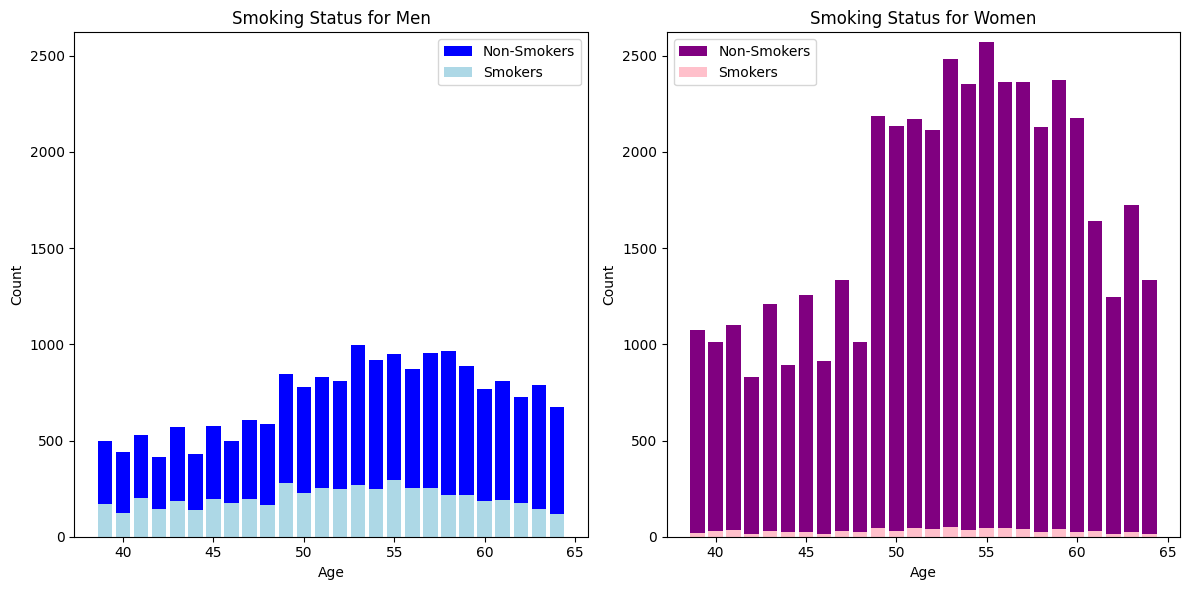

In [35]:
men_smoke_counts = cardio_men.groupby(['age', 'smoke'])['smoke'].count().unstack().fillna(0)
wom_smoke_counts = cardio_wom.groupby(['age', 'smoke'])['smoke'].count().unstack().fillna(0)

# Get max smokers count for y axis
max_count = max(men_smoke_counts.values.max(), wom_smoke_counts.values.max()) + 50

plt.figure(figsize=(12, 6))

# Plot for men
plt.subplot(1, 2, 1)
plt.bar(men_smoke_counts.index, men_smoke_counts[0], label='Non-Smokers', color='blue')
plt.bar(men_smoke_counts.index, men_smoke_counts[1], label='Smokers', color='lightblue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Smoking Status for Men')
plt.legend()
plt.ylim(0, max_count)  # Set y-axis limit

# Plot for women
plt.subplot(1, 2, 2)
plt.bar(wom_smoke_counts.index, wom_smoke_counts[0], label='Non-Smokers', color='purple')
plt.bar(wom_smoke_counts.index, wom_smoke_counts[1], label='Smokers', color='pink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Smoking Status for Women')
plt.legend()
plt.ylim(0, max_count)  # Set y-axis limit

plt.tight_layout()
plt.show()

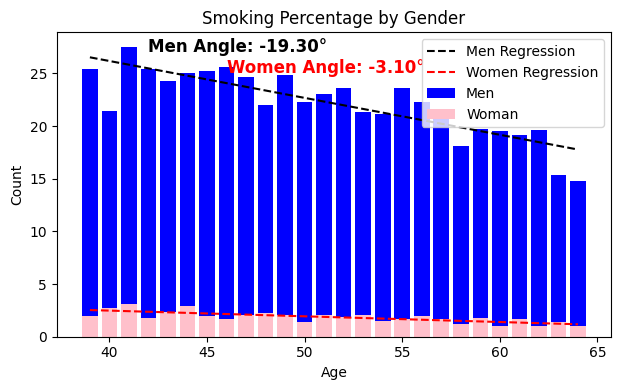

In [13]:
# Get smoker percentages
perc_men_smoke = (men_smoke_counts[1]/(men_smoke_counts[0]+men_smoke_counts[1]))*100
perc_wom_smoke = (wom_smoke_counts[1]/(wom_smoke_counts[0]+wom_smoke_counts[1]))*100

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(men_smoke_counts.index, perc_men_smoke, label='Men', color='blue')
plt.bar(wom_smoke_counts.index, perc_wom_smoke, label='Woman', color='pink')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Smoking Percentage by Gender')
plt.legend()

x_men = men_smoke_counts.index.values
x_women = wom_smoke_counts.index.values

from scipy.stats import linregress

# Men regression
slope_men, intercept_men, _, _, _ = linregress(x_men, perc_men_smoke)
regression_line_men = slope_men * x_men + intercept_men
plt.plot(x_men, regression_line_men, color='black', linestyle='--', label='Men Regression')

# Women regression
slope_women, intercept_women, _, _, _ = linregress(x_women, perc_wom_smoke)
regression_line_women = slope_women * x_women + intercept_women
plt.plot(x_women, regression_line_women, color='red', linestyle='--', label='Women Regression')

# Convert radians to degrees
angle_men = np.arctan(slope_men) * 180 / np.pi
angle_women = np.arctan(slope_women) * 180 / np.pi

# Plotting angles
plt.text(42, 27, f'Men Angle: {angle_men:.2f}°', fontsize=12, color='black', weight='bold')
plt.text(46, 25, f'Women Angle: {angle_women:.2f}°', fontsize=12, color='red', weight='bold')

plt.legend()
plt.show()

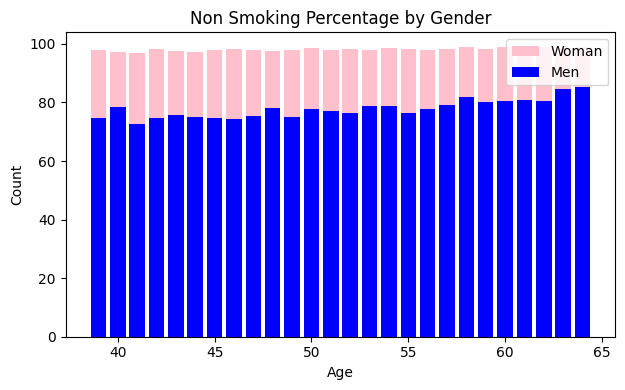

In [14]:
# Get non-smoker percentages
perc_men_no_smoke = (men_smoke_counts[0]/(men_smoke_counts[0]+men_smoke_counts[1]))*100
perc_wom_no_smoke = (wom_smoke_counts[0]/(wom_smoke_counts[0]+wom_smoke_counts[1]))*100

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(wom_smoke_counts.index, perc_wom_no_smoke, label='Woman', color='pink')
plt.bar(men_smoke_counts.index, perc_men_no_smoke, label='Men', color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Non Smoking Percentage by Gender')
plt.legend()

plt.show()

Both genders show a pronounced increase of data counts above 49 years old.

There are way less woman smokers than man smokers even having more than double the amount of data for woman than for man. So men smoke a lot more than woman across all the ages.

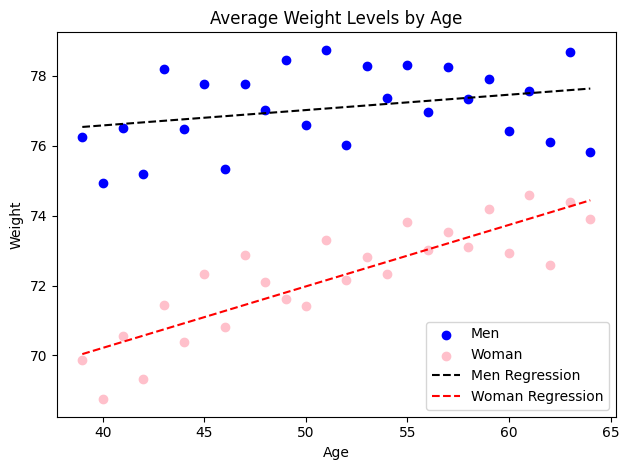

In [15]:
# Get weight sums by age
men_weight_sum = cardio_men.groupby('age')['weight'].sum()
wom_weight_sum = cardio_wom.groupby('age')['weight'].sum()

# Get ages count
men_age_weight_count = cardio_men.groupby('age').size()
wom_age_weight_count = cardio_wom.groupby('age').size()

# Get average weight by age
men_weight_avg = men_weight_sum / men_age_weight_count
wom_weight_avg = wom_weight_sum / wom_age_weight_count

plt.scatter(x=men_weight_avg.index, y=men_weight_avg, c='blue', label='Men')
plt.scatter(x=wom_weight_avg.index, y=wom_weight_avg, c='pink', label='Woman')

men_slope, men_intercept = np.polyfit(men_weight_avg.index, men_weight_avg, 1)
wom_slope, wom_intercept = np.polyfit(wom_weight_avg.index, wom_weight_avg, 1)

plt.plot(men_weight_avg.index, men_slope * men_weight_avg.index + men_intercept, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_weight_avg.index, wom_slope * wom_weight_avg.index + wom_intercept, color='red', linestyle='--', label='Woman Regression')

plt.xlabel('Age')
plt.ylabel('Weight')
plt.title('Average Weight Levels by Age')
plt.legend()
plt.show()

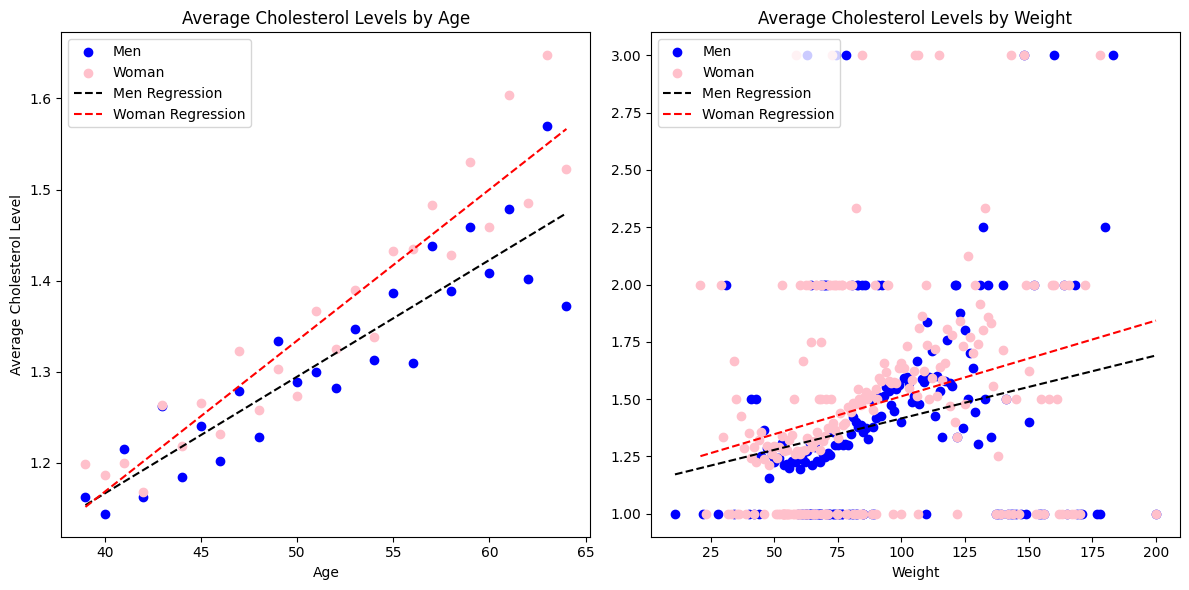

In [36]:
# Get sum of cholesterol by age
men_chol_sum = cardio_men.groupby('age')['cholesterol'].sum()
wom_chol_sum = cardio_wom.groupby('age')['cholesterol'].sum()

# Get ages count
men_age_chol_count = cardio_men.groupby('age').size()
wom_age_chol_count = cardio_wom.groupby('age').size()

# Get average cholesterol by age
men_chol_avg = men_chol_sum / men_age_chol_count
wom_chol_avg = wom_chol_sum / wom_age_chol_count

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# Create scatter plot
plt.scatter(x=men_chol_avg.index, y=men_chol_avg, c='blue', label='Men')
plt.scatter(x=wom_chol_avg.index, y=wom_chol_avg, c='pink', label='Woman')

men_slope, men_intercept = np.polyfit(men_chol_avg.index, men_chol_avg, 1)
wom_slope, wom_intercept = np.polyfit(wom_chol_avg.index, wom_chol_avg, 1)

# Plot average cholesterol by age
plt.plot(men_chol_avg.index, men_slope * men_chol_avg.index + men_intercept, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_chol_avg.index, wom_slope * wom_chol_avg.index + wom_intercept, color='red', linestyle='--', label='Woman Regression')

plt.xlabel('Age')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Levels by Age')
plt.legend()
# plt.show()


# Get sum of cholesterol by weight
men_chol_sum = cardio_men.groupby('weight')['cholesterol'].sum()
wom_chol_sum = cardio_wom.groupby('weight')['cholesterol'].sum()

# Get count of chol by weight
men_weight_chol_count = cardio_men.groupby('weight').size()
wom_weight_chol_count = cardio_wom.groupby('weight').size()

# Get average cholesterol by weight
men_chol_avg = men_chol_sum / men_weight_chol_count
wom_chol_avg = wom_chol_sum / wom_weight_chol_count

plt.subplot(1, 2, 2)

# Plot average cholesterol by weight
plt.scatter(x=men_chol_avg.index, y=men_chol_avg, c='blue', label='Men')
plt.scatter(x=wom_chol_avg.index, y=wom_chol_avg, c='pink', label='Woman')

# Fit regression lines
men_slope, men_intercept = np.polyfit(men_chol_avg.index, men_chol_avg, 1)
wom_slope, wom_intercept = np.polyfit(wom_chol_avg.index, wom_chol_avg, 1)

plt.plot(men_chol_avg.index, men_slope * men_chol_avg.index + men_intercept, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_chol_avg.index, wom_slope * wom_chol_avg.index + wom_intercept, color='red', linestyle='--', label='Woman Regression')

plt.xlabel('Weight')
# plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Levels by Weight')
plt.legend()


plt.show()

On this dataset, Woman increase weight much more than Men as they age. We can see a major influence in cholesterol as a consequence of gaining weight.

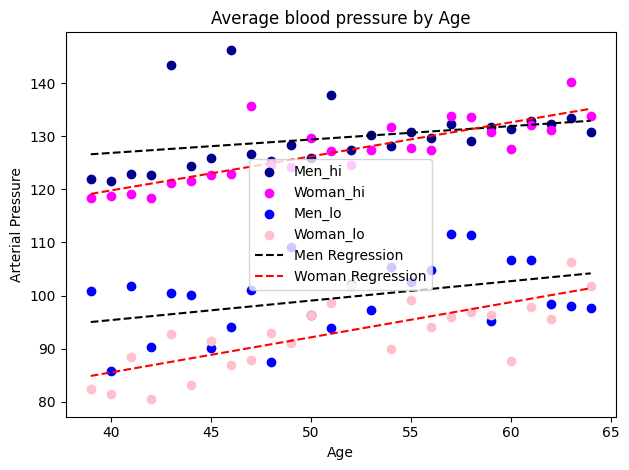

In [17]:
# Get arterial pressure sum by age
men_ap_hi_sum = cardio_men.groupby('age')['ap_hi'].sum()
wom_ap_hi_sum = cardio_wom.groupby('age')['ap_hi'].sum()
men_ap_lo_sum = cardio_men.groupby('age')['ap_lo'].sum()
wom_ap_lo_sum = cardio_wom.groupby('age')['ap_lo'].sum()

# Get count of ap by age
men_ap_hi_count = cardio_men.groupby('age').size()
wom_ap_hi_count = cardio_wom.groupby('age').size()

# Get average ap by age
men_ap_hi_avg = men_ap_hi_sum / men_ap_hi_count
wom_ap_hi_avg = wom_ap_hi_sum / wom_ap_hi_count
men_ap_lo_avg = men_ap_lo_sum / men_ap_hi_count
wom_ap_lo_avg = wom_ap_lo_sum / wom_ap_hi_count

# Create scatter plot
plt.scatter(x=men_ap_hi_avg.index, y=men_ap_hi_avg, c='darkblue', label='Men_hi')
plt.scatter(x=wom_ap_hi_avg.index, y=wom_ap_hi_avg, c='magenta', label='Woman_hi')
plt.scatter(x=men_ap_hi_avg.index, y=men_ap_lo_avg, c='blue', label='Men_lo')
plt.scatter(x=wom_ap_hi_avg.index, y=wom_ap_lo_avg, c='pink', label='Woman_lo')

men_slope, men_intercept = np.polyfit(men_ap_hi_avg.index, men_ap_hi_avg, 1)
wom_slope, wom_intercept = np.polyfit(wom_ap_hi_avg.index, wom_ap_hi_avg, 1)

plt.plot(men_ap_hi_avg.index, men_slope * men_ap_hi_avg.index + men_intercept, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_ap_hi_avg.index, wom_slope * wom_ap_hi_avg.index + wom_intercept, color='red', linestyle='--', label='Woman Regression')

men_slope_lo, men_intercept_lo = np.polyfit(men_ap_lo_avg.index, men_ap_lo_avg, 1)
wom_slope_lo, wom_intercept_lo = np.polyfit(wom_ap_lo_avg.index, wom_ap_lo_avg, 1)

plt.plot(men_ap_lo_avg.index, men_slope_lo * men_ap_lo_avg.index + men_intercept_lo, color='black', linestyle='--')
plt.plot(wom_ap_lo_avg.index, wom_slope_lo * wom_ap_lo_avg.index + wom_intercept_lo, color='red', linestyle='--')

plt.xlabel('Age')
plt.ylabel('Arterial Pressure')
plt.title('Average blood pressure by Age')
plt.legend()
plt.show()

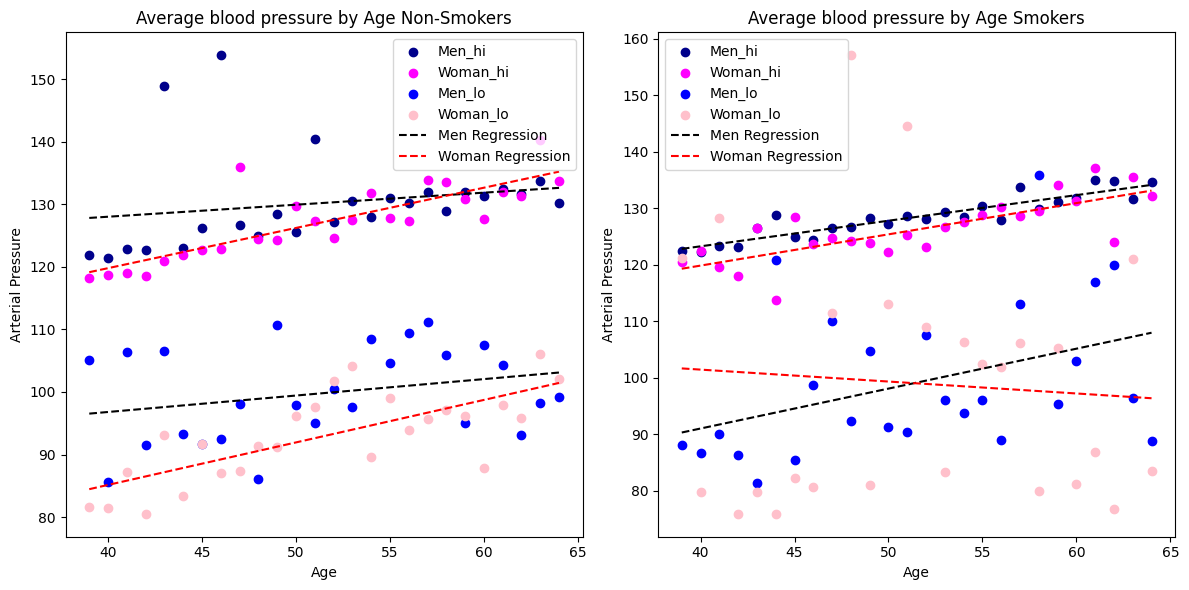

In [18]:
# Get smokers and non-smokers
cardio_men_no_smoke = cardio_men[cardio_men['smoke'] == 0]
cardio_men_smoke = cardio_men[cardio_men['smoke'] == 1]
cardio_wom_no_smoke = cardio_wom[cardio_wom['smoke'] == 0]
cardio_wom_smoke = cardio_wom[cardio_wom['smoke'] == 1]

# Get sum of ap for non-smokers
men_ap_hi_sum_no_smoke = cardio_men_no_smoke.groupby('age')['ap_hi'].sum()
wom_ap_hi_sum_no_smoke = cardio_wom_no_smoke.groupby('age')['ap_hi'].sum()
men_ap_lo_sum_no_smoke = cardio_men_no_smoke.groupby('age')['ap_lo'].sum()
wom_ap_lo_sum_no_smoke = cardio_wom_no_smoke.groupby('age')['ap_lo'].sum()

# Get count non-smokers by age
men_ap_hi_count_no_smoke = cardio_men_no_smoke.groupby('age').size()
wom_ap_hi_count_no_smoke = cardio_wom_no_smoke.groupby('age').size()

# Get average ap for non-smokers
men_ap_hi_avg_no_smoke = men_ap_hi_sum_no_smoke / men_ap_hi_count_no_smoke
wom_ap_hi_avg_no_smoke = wom_ap_hi_sum_no_smoke / wom_ap_hi_count_no_smoke
men_ap_lo_avg_no_smoke = men_ap_lo_sum_no_smoke / men_ap_hi_count_no_smoke
wom_ap_lo_avg_no_smoke = wom_ap_lo_sum_no_smoke / wom_ap_hi_count_no_smoke

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.scatter(x=men_ap_hi_avg_no_smoke.index, y=men_ap_hi_avg_no_smoke, c='darkblue', label='Men_hi')
plt.scatter(x=wom_ap_hi_avg_no_smoke.index, y=wom_ap_hi_avg_no_smoke, c='magenta', label='Woman_hi')
plt.scatter(x=men_ap_hi_avg_no_smoke.index, y=men_ap_lo_avg_no_smoke, c='blue', label='Men_lo')
plt.scatter(x=wom_ap_hi_avg_no_smoke.index, y=wom_ap_lo_avg_no_smoke, c='pink', label='Woman_lo')

men_slope_no_smoke, men_intercept_no_smoke = np.polyfit(men_ap_hi_avg_no_smoke.index, men_ap_hi_avg_no_smoke, 1)
wom_slope_no_smoke, wom_intercept_no_smoke = np.polyfit(wom_ap_hi_avg_no_smoke.index, wom_ap_hi_avg_no_smoke, 1)

plt.plot(men_ap_hi_avg_no_smoke.index, men_slope_no_smoke * men_ap_hi_avg_no_smoke.index + men_intercept_no_smoke, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_ap_hi_avg_no_smoke.index, wom_slope_no_smoke * wom_ap_hi_avg_no_smoke.index + wom_intercept_no_smoke, color='red', linestyle='--', label='Woman Regression')

men_slope_lo_no_smoke, men_intercept_lo_no_smoke = np.polyfit(men_ap_lo_avg_no_smoke.index, men_ap_lo_avg_no_smoke, 1)
wom_slope_lo_no_smoke, wom_intercept_lo_no_smoke = np.polyfit(wom_ap_lo_avg_no_smoke.index, wom_ap_lo_avg_no_smoke, 1)

plt.plot(men_ap_lo_avg_no_smoke.index, men_slope_lo_no_smoke * men_ap_lo_avg_no_smoke.index + men_intercept_lo_no_smoke, color='black', linestyle='--')
plt.plot(wom_ap_lo_avg_no_smoke.index, wom_slope_lo_no_smoke * wom_ap_lo_avg_no_smoke.index + wom_intercept_lo_no_smoke, color='red', linestyle='--')

plt.xlabel('Age')
plt.ylabel('Arterial Pressure')
plt.title('Average blood pressure by Age Non-Smokers')
plt.legend()


# Get smokers
men_ap_hi_sum_smoke = cardio_men_smoke.groupby('age')['ap_hi'].sum()
wom_ap_hi_sum_smoke = cardio_wom_smoke.groupby('age')['ap_hi'].sum()
men_ap_lo_sum_smoke = cardio_men_smoke.groupby('age')['ap_lo'].sum()
wom_ap_lo_sum_smoke = cardio_wom_smoke.groupby('age')['ap_lo'].sum()

# Get count of smokers by age
men_ap_hi_count_smoke = cardio_men_smoke.groupby('age').size()
wom_ap_hi_count_smoke = cardio_wom_smoke.groupby('age').size()

# Get average smokers by age
men_ap_hi_avg_smoke = men_ap_hi_sum_smoke / men_ap_hi_count_smoke
wom_ap_hi_avg_smoke = wom_ap_hi_sum_smoke / wom_ap_hi_count_smoke
men_ap_lo_avg_smoke = men_ap_lo_sum_smoke / men_ap_hi_count_smoke
wom_ap_lo_avg_smoke = wom_ap_lo_sum_smoke / wom_ap_hi_count_smoke

plt.subplot(1, 2, 2)

plt.scatter(x=men_ap_hi_avg_smoke.index, y=men_ap_hi_avg_smoke, c='darkblue', label='Men_hi')
plt.scatter(x=wom_ap_hi_avg_smoke.index, y=wom_ap_hi_avg_smoke, c='magenta', label='Woman_hi')
plt.scatter(x=men_ap_hi_avg_smoke.index, y=men_ap_lo_avg_smoke, c='blue', label='Men_lo')
plt.scatter(x=wom_ap_hi_avg_smoke.index, y=wom_ap_lo_avg_smoke, c='pink', label='Woman_lo')

men_slope_smoke, men_intercept_smoke = np.polyfit(men_ap_hi_avg_smoke.index, men_ap_hi_avg_smoke, 1)
wom_slope_smoke, wom_intercept_smoke = np.polyfit(wom_ap_hi_avg_smoke.index, wom_ap_hi_avg_smoke, 1)

plt.plot(men_ap_hi_avg_smoke.index, men_slope_smoke * men_ap_hi_avg_smoke.index + men_intercept_smoke, color='black', linestyle='--', label='Men Regression')
plt.plot(wom_ap_hi_avg_smoke.index, wom_slope_smoke * wom_ap_hi_avg_smoke.index + wom_intercept_smoke, color='red', linestyle='--', label='Woman Regression')

men_slope_lo_smoke, men_intercept_lo_smoke = np.polyfit(men_ap_lo_avg_smoke.index, men_ap_lo_avg_smoke, 1)
wom_slope_lo_smoke, wom_intercept_lo_smoke = np.polyfit(wom_ap_lo_avg_smoke.index, wom_ap_lo_avg_smoke, 1)

plt.plot(men_ap_lo_avg_smoke.index, men_slope_lo_smoke * men_ap_lo_avg_smoke.index + men_intercept_lo_smoke, color='black', linestyle='--')
plt.plot(wom_ap_lo_avg_smoke.index, wom_slope_lo_smoke * wom_ap_lo_avg_smoke.index + wom_intercept_lo_smoke, color='red', linestyle='--')

plt.xlabel('Age')
plt.ylabel('Arterial Pressure')
plt.title('Average blood pressure by Age Smokers')
plt.legend()

plt.show()

There is not enough data to draw a clear conclusion about woman smokers/non-smokers comparison other than it increases with age.

For Men there is a clear increase in arterial pressure rate for smokers compared to non-smokers.

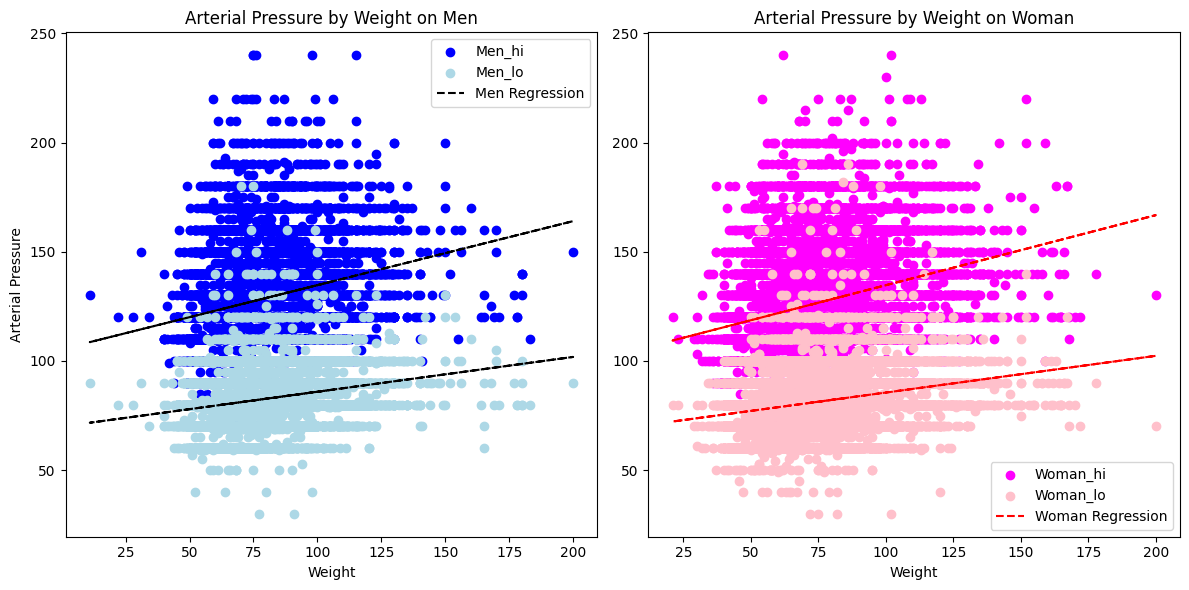

In [19]:
# Remove out of the ordinary values, negatives, outliers in arterial pressure.
cardio_men = cardio_men[cardio_men['ap_hi'] <= 280]
cardio_wom = cardio_wom[cardio_wom['ap_hi'] <= 280]
cardio_men = cardio_men[cardio_men['ap_lo'] <= 280]
cardio_wom = cardio_wom[cardio_wom['ap_lo'] <= 280]
cardio_men = cardio_men[cardio_men['ap_hi'] >= 30]
cardio_wom = cardio_wom[cardio_wom['ap_hi'] >= 30]
cardio_men = cardio_men[cardio_men['ap_lo'] >= 30]
cardio_wom = cardio_wom[cardio_wom['ap_lo'] >= 30]
men_weight = cardio_men['weight']
wom_weight = cardio_wom['weight']

men_ap_hi = cardio_men['ap_hi']
men_ap_lo = cardio_men['ap_lo']
wom_ap_hi = cardio_wom['ap_hi']
wom_ap_lo = cardio_wom['ap_lo']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.scatter(x=men_weight, y=men_ap_hi, c='blue', label='Men_hi')
plt.scatter(x=men_weight, y=men_ap_lo, c='lightblue', label='Men_lo')

men_slope, men_intercept = np.polyfit(men_weight, men_ap_hi, 1)
wom_slope, wom_intercept = np.polyfit(wom_weight, wom_ap_hi, 1)

plt.plot(men_weight, men_slope * men_weight + men_intercept, color='black', linestyle='--', label='Men Regression')
men_slope_lo, men_intercept_lo = np.polyfit(men_weight, men_ap_lo, 1)

plt.plot(men_weight, men_slope_lo * men_weight + men_intercept_lo, color='black', linestyle='--')

plt.xlabel('Weight')
plt.ylabel('Arterial Pressure')
plt.title('Arterial Pressure by Weight on Men')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x=wom_weight, y=wom_ap_hi, c='magenta', label='Woman_hi')
plt.scatter(x=wom_weight, y=wom_ap_lo, c='pink', label='Woman_lo')
plt.plot(wom_weight, wom_slope * wom_weight + wom_intercept, color='red', linestyle='--', label='Woman Regression')
wom_slope_lo, wom_intercept_lo = np.polyfit(wom_weight, wom_ap_lo, 1)
plt.plot(wom_weight, wom_slope_lo * wom_weight + wom_intercept_lo, color='red', linestyle='--')

plt.xlabel('Weight')
# plt.ylabel('Arterial Pressure')
plt.title('Arterial Pressure by Weight on Woman')
plt.legend()
plt.show()

Arterial pressure increases with weight bot in Men and Woman. AP HI increases on a greater rate than LO

In [20]:
cardio_alco

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


In [21]:
covid_data

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN
